# EDA

### Import libraries

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Load Data

In [ ]:
train_txt_raw = open('/content/drive/MyDrive/DL Lab Project Data/us_train.text','r',encoding="utf8")
train_labels_raw = open('/content/drive/MyDrive/DL Lab Project Data/us_train.labels','r',encoding="utf8")

train_txt = []
train_labels = []

for sentence in train_txt_raw:
    sentence = sentence.rstrip()
    train_txt.append(sentence)
    
for sentence in train_labels_raw:
    sentence = sentence.rstrip()
    sentence = int(sentence)
    train_labels.append(sentence)


df = pd.DataFrame()
df["Tweet"] = train_txt
df["Label"] = train_labels

In [ ]:
df.head(10)

,Tweet,Label
0,A little throwback with my favourite person @ ...,0
1,glam on @user yesterday for #kcon makeup using...,7
2,Democracy Plaza in the wake of a stunning outc...,11
3,Then &amp; Now. VILO @ Walt Disney Magic Kingdom,0
4,Who never... @ A Galaxy Far Far Away,2
5,Dinner in FLA tonight // Pan-seared salmon ove...,1
6,It's my fav seniors last game congrats on beat...,8
7,I got to to go formal with my best friend @ Ph...,0
8,'Cause I Miss My Little Homies .#Throwback #Co...,13
9,"Birthday Kisses @ Madison, Wisconsin",9


### Emoji mapping

In [ ]:
emoji_raw = open('/content/drive/MyDrive/DL Lab Project Data/us_mapping.txt','r',encoding="utf8")

emojis=[]
for sentence in emoji_raw:
    print(sentence)
    sentence = sentence.rstrip()
    emojis.append(sentence)

mapp = []
emos = []
sent = []

for e in emojis:
    mapp.append(e.split()[0])
    emos.append(e.split()[1])
    sent.append(" ".join(e.split()[2:]))

df_em = pd.DataFrame({'Label':mapp})
df_em["Emoji"] = emos
df_em["Description"] = sent

0	❤️	 Red heart	

1	😍	 Smiling face with hearteyes	

2	😂	 Face with tears of joy	

3	💕	 Two hearts

4	🔥	 Fire

5	😊	 Smiling face with smiling eyes	

6	😎	 Smiling face with sunglasses	

7	✨	 Sparkles 	

8	💙	 Blue heart

9	😘	 Face blowing a kiss	

10	📷	 Camera	

11	🇺🇸	 United States	

12	☀️	 Sun

13	💜	 Purple heart 	

14	😉	 Winking face	

15	💯	 Hundred points	

16	😁	 Beaming face with smiling eyes	

17	🎄	Christmas tree	

18	📸	Camera with flash

19	😜	Winking face with tongue	



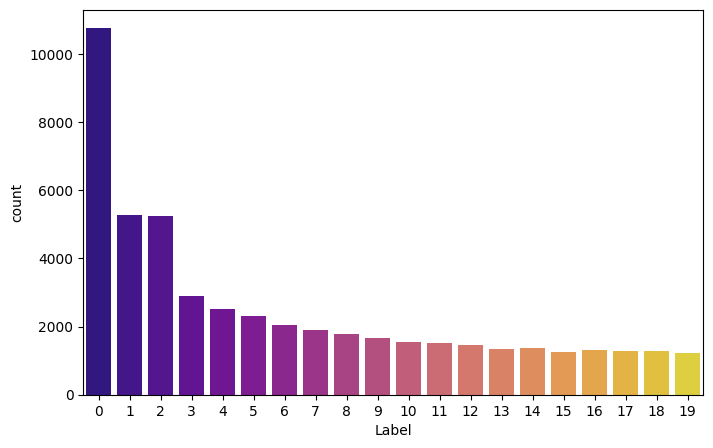

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x="Label", data=df, palette="plasma")
plt.show()

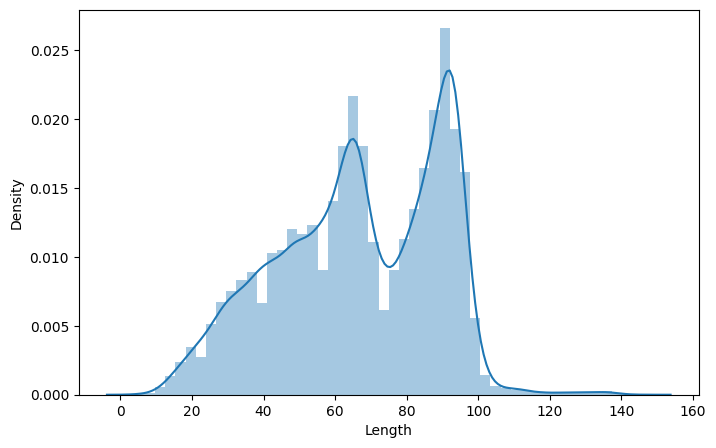

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

plt.figure(figsize=(8,5))
df["Length"] = df["Tweet"].apply(len)
sns.distplot(df["Length"])
plt.show()

In [ ]:
df.describe()

,Label,Length
count,50000.000000,50000.000000
mean,5.903680,66.645380
std,5.851024,22.514753
min,0.000000,4.000000
25%,1.000000,50.000000
50%,4.000000,67.000000
75%,10.000000,87.000000
max,19.000000,146.000000


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import tensorflow.keras

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DL Lab Project Data/stp_lm.csv")
df.dropna(inplace=True)

In [ ]:
df.head(10)

,Tweet,Label
0,little throwback favourite person water wall,0
1,glam yesterday kcon makeup featherette,7
2,democracy plaza wake stunning outcome decision...,11
3,amp vilo walt disney magic kingdom,0
4,galaxy far far away,2
5,dinner fla tonight panseared salmon couscous...,1
6,fav senior game congrats beating west west s...,8
7,got formal best friend phi mu jsu,0
8,cause miss little homies throwback cousinlove ...,13
9,birthday kiss madison wisconsin,9


# Emoji Prediction using Deep Learning

####     

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import tensorflow.keras

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DL Lab Project Data/stp_lm.csv")
df.dropna(inplace=True)

In [ ]:
df.head(10)

,Tweet,Label
0,little throwback favourite person water wall,0
1,glam yesterday kcon makeup featherette,7
2,democracy plaza wake stunning outcome decision...,11
3,amp vilo walt disney magic kingdom,0
4,galaxy far far away,2
5,dinner fla tonight panseared salmon couscous...,1
6,fav senior game congrats beating west west s...,8
7,got formal best friend phi mu jsu,0
8,cause miss little homies throwback cousinlove ...,13
9,birthday kiss madison wisconsin,9


### Over-sampling data

In [ ]:
X = df["Tweet"].values
y = df["Label"].values

In [ ]:
from imblearn.over_sampling import RandomOverSampler

os = RandomOverSampler()
X = X.reshape(-1,1)
X, y = os.fit_resample(X, y)

In [ ]:
X = X.reshape(-1,)
X.shape

(215160,)

### Tokenization

In [ ]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=80000)
tokenizer.fit_on_texts(X)

In [ ]:
print("Text \n",X[:10],'\n')

X_seqs = tokenizer.texts_to_sequences(X)
print("Sequences")
X_seqs[:10]

Text 
 ['little throwback favourite person   water wall'
 'glam   yesterday kcon makeup   featherette'
 'democracy plaza wake stunning outcome decision   nbc news'
 'amp vilo   walt disney magic kingdom' '  galaxy far far away'
 'dinner fla tonight   panseared salmon couscous veggie salad yum dinner florida salmon'
 'fav senior game congrats beating west   west salem'
 'got formal best friend   phi mu jsu'
 'cause miss little homies throwback cousinlove   indiana university'
 'birthday kiss   madison wisconsin'] 

Sequences


[[29, 288, 1633, 319, 495, 607],
 [3394, 173, 26944, 539, 26945],
 [4105, 588, 773, 1068, 5999, 2412, 5048, 1288],
 [6, 43199, 418, 62, 144, 250],
 [2549, 638, 638, 403],
 [133, 11435, 37, 43200, 2669, 43201, 3187, 1612, 1645, 133, 45, 2669],
 [395, 339, 86, 441, 7646, 128, 128, 2606],
 [17, 894, 18, 22, 834, 2701, 20093],
 [405, 85, 29, 1500, 288, 6989, 414, 16],
 [28, 541, 573, 748]]

In [ ]:
idx2words = tokenizer.index_word

print("Word Mappings\n")
for i in range(1,10):
    print("Index: ",i, "---->",idx2words[i])

Word Mappings

Index:  1 ----> love
Index:  2 ----> new
Index:  3 ----> day
Index:  4 ----> nt
Index:  5 ----> happy
Index:  6 ----> amp
Index:  7 ----> beach
Index:  8 ----> christmas
Index:  9 ----> time


In [ ]:
vocab_size = len(tokenizer.index_word)
print("Vocabulary size :",len(tokenizer.index_word))

Vocabulary size : 54697


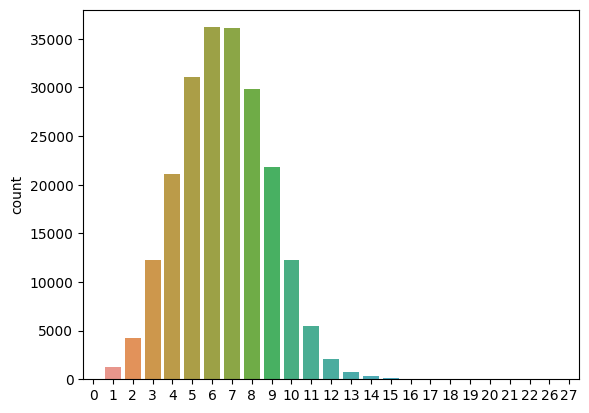

In [ ]:
lens = [len(seq) for seq in X_seqs]
sns.countplot(x=lens)
plt.show()

In [ ]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from keras.utils import pad_sequences

max_len=40
X_seqs_pd = pad_sequences(X_seqs, truncating="pre", padding="pre", maxlen=max_len)

In [ ]:
print("Before Padding")
print(X_seqs[:1])

print("\nAfter Padding")
print(X_seqs_pd[:1])

Before Padding
[[29, 288, 1633, 319, 495, 607]]

After Padding
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0   29  288 1633  319  495  607]]


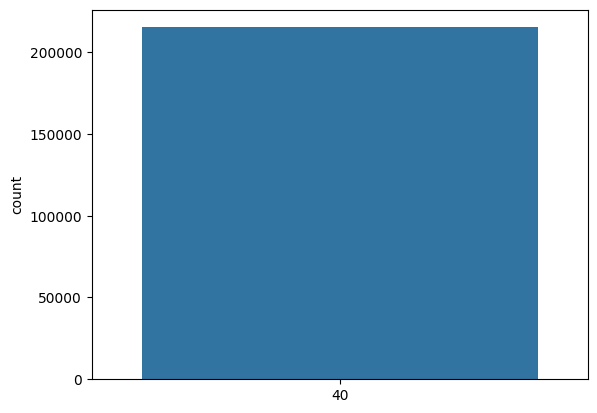

In [ ]:
lens = [len(seq) for seq in X_seqs_pd]
sns.countplot(x=lens)
plt.show()

### Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test ,y_train, y_test = train_test_split(X_seqs_pd, y, test_size=0.3, random_state=105)
print("Training X Dim ",X_train.shape)
print("Training y Dim ",y_train.shape)

print("Test X Dim ",X_test.shape)
print("Test y Dim ",y_test.shape)

Training X Dim  (150612, 40)
Training y Dim  (150612,)
Test X Dim  (64548, 40)
Test y Dim  (64548,)


## Deep Learning  Model using LSTMs

In [ ]:
from keras.models import Sequential
from keras.layers import Dropout, Dense, LSTM, Bidirectional,Embedding, GlobalMaxPool1D



vocabulary_size = vocab_size
seq_len = 40
embed_len=20

model = Sequential()
model.add(Embedding(vocabulary_size+1, embed_len, input_length=seq_len))
model.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(LSTM(units=64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=20, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 40, 20)            1093960   
                                                                 
 lstm_2 (LSTM)               (None, 40, 128)           76288     
                                                                 
 lstm_3 (LSTM)               (None, 64)                49408     
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 20)                660       
                                                                 
Total params: 1,222,396
Trainable params: 1,222,396
No

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_loss", mode="min", patience=1,verbose=1)

model.compile(loss = 'categorical_crossentropy',
             optimizer = "adam",
             metrics=["accuracy"])

In [ ]:
from keras.utils import to_categorical

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [ ]:
batch_size=512
epochs = 20

model.fit(X_train, y_train_cat, batch_size=batch_size, epochs = epochs, shuffle=True,
          validation_data=(X_test, y_test_cat))

Epoch 1/20
 12/295 [>.............................] - ETA: 2:22 - loss: 2.9960 - accuracy: 0.0457

KeyboardInterrupt: ignored

In [ ]:
model.evaluate(X_test, y_test_cat, batch_size=batch_size)

118/118 [==============================] - 0s 4ms/step - loss: 5.2540 - accuracy: 0.2008


[5.253969192504883, 0.20078687369823456]

In [ ]:
loss = pd.DataFrame(model.history.history)
loss

""


[]

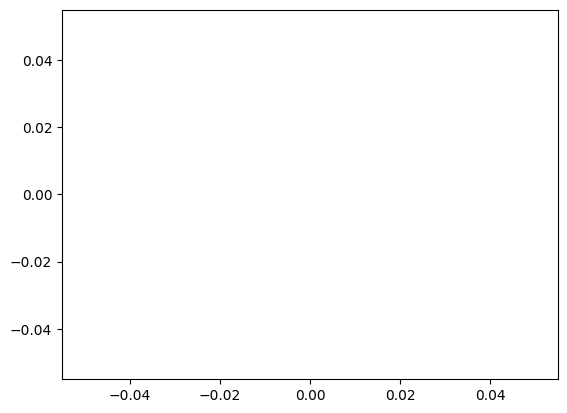

In [ ]:
plt.plot(loss)

In [ ]:
model.save('LSTM.h5')

## Deep Learning  Model using RNNs

In [ ]:
from keras.models import Sequential
from keras.layers import Dropout, Dense, LSTM, Bidirectional,Embedding, GlobalMaxPool1D
from keras.layers import Dense, Input, Dropout, SimpleRNN,LSTM, Activation




vocabulary_size = vocab_size
seq_len = 40
embed_len = 20

model = Sequential()
model.add(Embedding(input_dim=vocabulary_size+1, output_dim=embed_len, input_length=seq_len))
model.add(SimpleRNN(units=64))
model.add(Dropout(0.5))
model.add(Dense(units=20, activation='softmax'))


model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 40, 20)            1093960   
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 64)                5440      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 20)                1300      
                                                                 
Total params: 1,100,700
Trainable params: 1,100,700
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_loss", mode="min", patience=1,verbose=1)

model.compile(loss = 'categorical_crossentropy',
             optimizer = "adam",
             metrics=["accuracy"])

In [ ]:
from keras.utils import to_categorical

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [ ]:
batch_size=512
epochs = 20

model.fit(X_train, y_train_cat, batch_size=batch_size, epochs = epochs, shuffle=True,
          validation_data=(X_test, y_test_cat))

Epoch 1/20
295/295 [==============================] - 46s 149ms/step - loss: 2.7121 - accuracy: 0.1955 - val_loss: 2.2274 - val_accuracy: 0.4078
Epoch 2/20
295/295 [==============================] - 22s 76ms/step - loss: 1.6747 - accuracy: 0.5377 - val_loss: 1.2686 - val_accuracy: 0.6728
Epoch 3/20
295/295 [==============================] - 20s 68ms/step - loss: 1.0313 - accuracy: 0.7203 - val_loss: 0.9109 - val_accuracy: 0.7627
Epoch 4/20
295/295 [==============================] - 17s 57ms/step - loss: 0.7313 - accuracy: 0.8002 - val_loss: 0.7591 - val_accuracy: 0.8039
Epoch 5/20
295/295 [==============================] - 16s 54ms/step - loss: 0.5674 - accuracy: 0.8469 - val_loss: 0.6847 - val_accuracy: 0.8266
Epoch 6/20
295/295 [==============================] - 16s 55ms/step - loss: 0.4634 - accuracy: 0.8747 - val_loss: 0.6389 - val_accuracy: 0.8465
Epoch 7/20
295/295 [==============================] - 15s 51ms/step - loss: 0.3915 - accuracy: 0.8942 - val_loss: 0.6120 - val_accuracy

In [ ]:
model.evaluate(X_test, y_test_cat, batch_size=batch_size)

127/127 [==============================] - 1s 5ms/step - loss: 0.6323 - accuracy: 0.8961


[0.6322582364082336, 0.8960618376731873]

In [ ]:
model.save('RNN.h5')

## Deep Learning  Model using Bidirectional-LSTMs

In [ ]:
from keras.models import Sequential
from keras.layers import Dropout, Dense, LSTM, Bidirectional,Embedding, GlobalMaxPool1D



vocabulary_size = vocab_size
seq_len = 40
embed_len=128


model = Sequential()
model.add(Embedding(vocabulary_size+1, embed_len, input_length=seq_len))
model.add(Bidirectional(LSTM(80,return_sequences=True)))
model.add(Bidirectional(LSTM(80,return_sequences=True)))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.5))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(20, activation="softmax"))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 40, 128)           7001344   
                                                                 
 bidirectional_2 (Bidirectio  (None, 40, 160)          133760    
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 40, 160)          154240    
 nal)                                                            
                                                                 
 global_max_pooling1d_1 (Glo  (None, 160)              0         
 balMaxPooling1D)                                                
                                                                 
 dropout_8 (Dropout)         (None, 160)               0         
                                                      

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# early_stop = EarlyStopping(monitor="val_loss", mode="min", patience=0,verbose=1)

model.compile(loss = 'categorical_crossentropy',
             optimizer = "adam",
             metrics=["accuracy"])

In [ ]:
from keras.utils import to_categorical

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [ ]:
batch_size=256
epochs = 15

model.fit(X_train, y_train_cat, batch_size=batch_size, epochs = epochs, 
          shuffle=True,validation_data=(X_test, y_test_cat))

Epoch 1/15
547/547 [==============================] - 29s 53ms/step - loss: 1.6965 - accuracy: 0.4799 - val_loss: 2.8341 - val_accuracy: 0.2526
Epoch 2/15
547/547 [==============================] - 10s 19ms/step - loss: 1.4221 - accuracy: 0.5579 - val_loss: 3.1125 - val_accuracy: 0.2285
Epoch 3/15
547/547 [==============================] - 10s 18ms/step - loss: 1.1804 - accuracy: 0.6330 - val_loss: 3.5365 - val_accuracy: 0.2098
Epoch 4/15
547/547 [==============================] - 9s 16ms/step - loss: 0.9965 - accuracy: 0.6898 - val_loss: 3.9780 - val_accuracy: 0.2161
Epoch 5/15
400/547 [====================>.........] - ETA: 2s - loss: 0.8369 - accuracy: 0.7422

KeyboardInterrupt: ignored

In [ ]:
model.evaluate(X_test, y_test, batch_size=batch_size)

1009/1009 [==============================] - 7s 7ms/step - loss: 0.5038 - accuracy: 0.8874


[0.5403534173965454, 0.8935310244560242]

# Emoji Prediction on Tweets

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import tensorflow.keras

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DL Lab Project Data/emoji_uncleaned.csv").sample(n=30)
df.dropna(inplace=True)

X = df["Tweet"].values
y = df["Label"].values

In [ ]:
emoji_raw = open('/content/drive/MyDrive/DL Lab Project Data/us_mapping.txt','r',encoding="utf8")

emojis=[]
for sentence in emoji_raw:
    sentence = sentence.rstrip()
    emojis.append(sentence)

    
emoji_dict={}

for e in emojis:
    idx = int(e.split()[0])
    emoji = e.split()[1]
    emoji_dict[idx] = emoji

In [ ]:
!pip install keras_preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.2 MB/s eta 0:00:00


In [ ]:
from keras.utils import pad_sequences

tokenizer = pickle.load(open("/content/drive/MyDrive/DL Lab Project Data/tweet_tokenizer",'rb'))

def preprocess_text(X):
    max_len=40
    X_seqs = tokenizer.texts_to_sequences(X)
    X_seqs_pd = pad_sequences(X_seqs, truncating="pre", padding="pre", maxlen=max_len)
    return X_seqs_pd

In [ ]:
from tensorflow import keras

model = keras.models.load_model("/content/drive/MyDrive/DL Lab Project Data/BLSTM.h5", compile=False)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 40, 128)           8022016   
                                                                 
 bidirectional (Bidirectiona  (None, 40, 160)          133760    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 40, 160)          154240    
 nal)                                                            
                                                                 
 global_max_pooling1d (Globa  (None, 160)              0         
 lMaxPooling1D)                                                  
                                                                 
 dropout (Dropout)           (None, 160)               0         
                                                        

In [ ]:
X_sequences = preprocess_text(X)
predictions = np.argmax(model.predict(X_sequences), axis=1)

y_map = [emoji_dict[idx] for idx in y]
predictions = [emoji_dict[idx] for idx in predictions]

results = pd.DataFrame({"Tweet":X})
results["True"] = y_map
results["Predicted"] = predictions

results

1/1 [==============================] - 2s 2s/step


,Tweet,True,Predicted
0,I love y'all Happy Thanksgiving .. Thank you f...,😊,😊
1,Tonight was a blessing. Thankfully I didn't ge...,😂,😂
2,Let's enjoy our vacations #UStrip #us #juntose...,🇺🇸,🇺🇸
3,Back at one of my favorite resorts waltdisneyw...,😍,😍
4,When your having a bad day! @ Vacaville Premiu...,😂,😂
5,Wht're u doing shawn? @user @ From My Heart To...,😂,❤️
6,I really like this one. #zebralover #757 #norf...,😊,😊
7,happy birthday mike live it up @user,💯,💯
8,"i_got_skillzzzzz PANDAS! @ National Zoo, Panda...",❤️,😍
9,When campo gives out cookies to get you throug...,❤️,❤️


## Emojify Tweet

In [ ]:
import string
import re

from tensorflow import keras
emoji_predict_model = keras.models.load_model("/content/drive/MyDrive/DL Lab Project Data/BLSTM.h5", compile=False)


def tweet_clean(tweet):
    tweet = str(tweet).lower()
    rm_mention = re.sub(r'@[A-Za-z0-9]+', '', tweet)                       # remove @mentions
    rm_rt = re.sub(r'RT[/s]+', '', rm_mention)                             # remove RT
    rm_links = re.sub(r'http\S+', '', rm_rt)                               # remove hyperlinks
    rm_links = re.sub(r'https?:\/\/\S+','', rm_links)
    rm_nums = re.sub('[0-9]+', '', rm_links)                               # remove numbers
    rm_punc = [char for char in rm_nums if char not in string.punctuation] # remove punctuations
    rm_punc = ''.join(rm_punc)
    cleaned = rm_punc
    
    return cleaned


def predict_emoji(text, model=emoji_predict_model):
    text = tweet_clean(text)
    X_sequences = preprocess_text([text])



    emoji_list = [emoji_dict[i] for i in range(len(emoji_dict))] # create a list of emojis

    fig, ax = plt.subplots(figsize=(10, 2))
    im = ax.imshow(model.predict(X_sequences), cmap='Blues') # display the list of probabilities as a row of values
    ax.set_xticks(np.arange(len(emoji_list)))
    ax.set_xticklabels(emoji_list, rotation=90)
    ax.set_yticks([])
    cbar = ax.figure.colorbar(im, ax=ax)
    cbar.ax.set_ylabel("Probability", va="bottom")
    plt.show()


    print(model.predict(X_sequences))    
    predictions = np.argmax(model.predict(X_sequences), axis=1)
    print(predictions)
    emoji_idx = predictions[0]
    emoji = emoji_dict[emoji_idx]
    
    return emoji

In [ ]:
model2 = Sequential()
model2.add(SimpleRNN(64, input_shape=(10,50), return_sequences=True))
model2.add(Dropout(0.5))
model2.add(SimpleRNN(64, return_sequences=False))
model2.add(Dropout(0.5))
model2.add(Dense(5))
model2.add(Activation('softmax'))

model2.summary()

In [ ]:
import pickle
pickle_out = open("emp-model.pkl","wb")
pickle.dump(model, pickle_out)
pickle_out.close()

In [ ]:
model1 = pickle.load(open('/content/emp-model.pkl','rb'))

Enter tweet 

hi my name is kaustabh


 Emojified Tweet 


1/1 [==============================] - 2s 2s/step


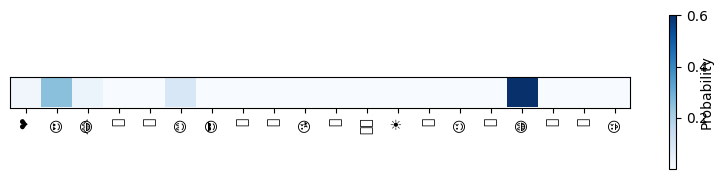

1/1 [==============================] - 0s 31ms/step
[[2.0211082e-02 2.5285679e-01 3.1283475e-02 3.4835649e-04 7.9065721e-06
  9.2390612e-02 1.2391579e-05 1.7967650e-04 2.3039202e-04 4.1258943e-04
  4.4340565e-04 1.7698502e-04 6.9139588e-07 5.0508214e-07 1.0473267e-05
  1.2954441e-08 6.0137337e-01 3.1626057e-10 5.9668682e-06 5.5293633e-05]]
1/1 [==============================] - 0s 36ms/step
[16]
hi my name is kaustabh 😁


In [ ]:
text = input("Enter tweet \n\n")

print("\n\n Emojified Tweet \n\n")
print(text+" "+predict_emoji(text))

In [ ]:
!pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 58.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 109.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 22.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.0 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19579 sha256=c90499fd57caadbcfd08410a0140440453b2172380439efe12d1a5964831bd7f
  Stored in directory: /root/.cache/pip/wheels/f2/ed/dd/d3a556ad245ef9dc570c6bcd2f22886d17b0b408dd3bbb9ac3
Successfully built validators


In [ ]:
!streamlit run /content/dlops_project.py




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.105.32.208:8501



  Stopping...
  Stopping...


In [ ]:
import tensorflow as tf
import tensorflow.keras.backend as K
import matplotlib.pyplot as plt

def get_word_importance(text, model, tokenizer):
    # Convert the text to a sequence of word indices
    sequence = tokenizer.texts_to_sequences([text])[0]
    
    # Pad the sequence to the maximum length
    sequence = tf.keras.preprocessing.sequence.pad_sequences([sequence], maxlen=seq_len)
    
    # Create a function to compute the integrated gradients
    input_tensor = model.input
    output_tensor = model.output
    with tf.GradientTape() as tape:
        predictions = model(sequence)
    gradients = tape.gradient(predictions, input_tensor)[0]
    
    # Compute the integrated gradients
    baseline = np.zeros_like(sequence)
    step_sizes = (sequence - baseline) / 100
    step_sequence = [baseline + i * step_sizes for i in range(101)]
    gradients = tape.gradient(predictions, input_tensor)[0]
    avg_gradients = np.average(gradients, axis=0)
    integrated_gradients = (sequence - baseline) * avg_gradients
    
    # Compute the word importance scores
    word_importance = np.sum(np.abs(integrated_gradients), axis=-1)
    
    # Plot the heatmap of word importance scores
    fig, ax = plt.subplots(figsize=(8, 2))
    im = ax.imshow(word_importance, cmap='Blues')
    ax.set_xticks(np.arange(len(sequence)))
    ax.set_xticklabels([tokenizer.index_word[i] for i in sequence], rotation=90)
    ax.set_yticks([])
    cbar = ax.figure.colorbar(im, ax=ax)
    cbar.ax.set_ylabel("Importance", rotation=-90, va="bottom")
    plt.show()
    
    # Return the word importance scores
    return word_importance

text = "I love my new car ❤️"
word_importance = get_word_importance(text, model, tokenizer)


AttributeError: ignored

In [ ]:
text = input("Enter tweet \n\n")

print("\n\n Emojified Tweet \n\n")
print(text+" "+predict_emoji(text)[0])

In [ ]:
text = input("Enter tweet \n\n")

print("\n\n Emojified Tweet \n\n")
print(text+" "+predict_emoji(text))

In [ ]:
text = input("Enter tweet \n\n")

print("\n\n Emojified Tweet \n\n")
print(text+" "+predict_emoji(text))

In [ ]:
text = input("Enter tweet \n\n")

print("\n\n Emojified Tweet \n\n")
print(text+" "+predict_emoji(text))